# Basic usage of the _ECG200_ data set from the UEA/UCR repository with `loadmydata`

*Last update: May 10, 2021.*

This data set is taken from the [UEA & UCR Time Series Classification Repository](http://www.timeseriesclassification.com/index.php) and is loaded using `loadmydata`. This dataset was formatted by R. Olszewski as part of his thesis "Generalized feature extraction for structural pattern recognition in time-series data" at Carnegie Mellon University, 2001. Each series traces the electrical activity recorded during one heartbeat. The two classes are a normal heartbeat and a Myocardial Infarction.

## Setup

We import some functions from the `loadmydata` package:

In [1]:
from loadmydata.load_uea_ucr import load_uea_ucr_data
from loadmydata.padding import get_signal_shape
from random import sample

We also import some other libraries that will be useful for our analysis:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)
import seaborn as sns
sns.set_theme()

## Loading the data

In [3]:
dataset_name = "ECG200"
data = load_uea_ucr_data(dataset_name)

*Note*: It will download the data only once for all (even if you restart the kernel of this notebook).

## Understanding the format of the data

The attributes of `data` are:

In [4]:
print(data.keys())

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'description', 'url', 'location'])


*Note*: The data from the UEA/UCR repository is already split in train/test for benchmark purposes.

First of all, let us look into `data.X_train`:

In [5]:
X_train = data.X_train
print(f'The type of X_train is: \n\t{type(X_train)}')
print(f'\nThe shape of X_train is: \n\t{X_train.shape}')
print(f'\nThe overall mean of X_train is: \n\t{np.mean(X_train)}')
print(f'\nThe overall standard deviation of X_train is: \n\t{np.std(X_train)}')

The type of X_train is: 
	<class 'numpy.ma.core.MaskedArray'>

The shape of X_train is: 
	(100, 96, 1)

The overall mean of X_train is: 
	1.563919808470852e-10

The overall standard deviation of X_train is: 
	0.9947780323086644


*Observations*:
- The data is univariate.
- We have "small data".
- The data seems to have already been z-normalized: the mean is close to 0 and the standard deviation is close to 1.

Consider a data set of $N$ time series $y^{(1)}, y^{(2)}, \ldots, y^{(N)}$.
Each $y^{(n)}$ has $T^{(n)}$ samples and $d$ dimensions.
Such a data set is contained in a `numpy` array of shape $(N, T, d)$ where $T := \max_n T^{(n)}$.
Time series with less than $T$ samples are padded at the end with `numpy.nan`.
In addition, the extra padding is masked using [numpy's MaskedArray](https://numpy.org/doc/stable/reference/maskedarray.html).

In [6]:
def get_info(X):

    l_n_samples_without_padding, l_n_dims = [], []

    for signal in X:
        # signal is a masked array of shape (T, d).

        # The true number of samples of the signal (without extra padding) can be accessed with:
        n_samples, n_dims = get_signal_shape(signal)

        # To get the signal without the extra padding, do:
        signal_without_padding = signal[:n_samples]
        n_samples_without_padding = len(signal_without_padding)

        l_n_samples_without_padding.append(n_samples_without_padding)
        l_n_dims.append(n_dims)

    print(f'The unique values of the lengths of the signals without padding are:\n\t{set(l_n_samples_without_padding)}')
    print(f'\nThe unique values of the dimensions of the signals are:\n\t{set(l_n_dims)}')

In [7]:
get_info(X_train)

The unique values of the lengths of the signals without padding are:
	{96}

The unique values of the dimensions of the signals are:
	{1}


Hence, all the signals (even without padding) have the same length as well as the same dimension.

We can also choose to bypass `numpy`'s MaskedArray because sometimes we wish to not have the `np.nan` values from the extra padding:

In [8]:
X_train_data = X_train.data
print(f'The type of X_train_data is: \n\t{type(X_train_data)}')
print(f'\nThe shape of X_train_data is: \n\t{X_train_data.shape}')

The type of X_train_data is: 
	<class 'numpy.ndarray'>

The shape of X_train_data is: 
	(100, 96, 1)


Now, let us look into `data.y_train`:

In [9]:
y_train = data.y_train

print(f'The type of y_train is: \n\t{type(y_train)}')
print(f'\nThe shape of y_train is: \n\t{y_train.shape}')
print(f'\nThe unique values of y_train are: \n\t{set(y_train)}')

The type of y_train is: 
	<class 'numpy.ndarray'>

The shape of y_train is: 
	(100,)

The unique values of y_train are: 
	{'1', '-1'}


For `X_test`, we do the same as for `X_train`:

In [10]:
X_test = data.X_test
X_test_data = X_test.data

print(f'The type of X_test is: \n\t{type(X_test)}')
print(f'\nThe overall mean of X_test is: \n\t{np.mean(X_test)}')
print(f'\nThe overall standard deviation of X_test is: \n\t{np.std(X_test)}')
print(f'\nThe type of the data attribute of X_test is: \n\t{type(X_test_data)}')
print(f'\nThe shape of the data attribute of X_test is: \n\t{X_test_data.shape}\n')
get_info(X_test)

The type of X_test is: 
	<class 'numpy.ma.core.MaskedArray'>

The overall mean of X_test is: 
	1.432010406550906e-10

The overall standard deviation of X_test is: 
	0.9947780324022082

The type of the data attribute of X_test is: 
	<class 'numpy.ndarray'>

The shape of the data attribute of X_test is: 
	(100, 96, 1)

The unique values of the lengths of the signals without padding are:
	{96}

The unique values of the dimensions of the signals are:
	{1}


For `y_test`, we do the same as for `y_train`:

In [11]:
y_test = data.y_test

print(f'The type of y_train is: \n\t{type(y_test)}')
print(f'\nThe shape of y_train is: \n\t{y_test.shape}')
print(f'\nThe unique values of y_train are: \n\t{set(y_test)}')

The type of y_train is: 
	<class 'numpy.ndarray'>

The shape of y_train is: 
	(100,)

The unique values of y_train are: 
	{'1', '-1'}


## A short exploratory data analysis (EDA) on the ECG200 data set

### Plotting the signals

First of all, let us consider `X_train` and `X_test` as a 2D arrays:

In [12]:
X_train_2d = X_train[:, :, 0]
print(f'The shape of X_train_2d is:\n\t{X_train_2d.shape}')

X_test_2d = X_test[:, :, 0]
print(f'\nThe shape of X_test_2d is:\n\t{X_test_2d.shape}')

The shape of X_train_2d is:
	(100, 96)

The shape of X_test_2d is:
	(100, 96)


In [13]:
def plot_signals(X_2d, name_dataset, name_data_split, n_samples_to_plot=10):

    n_samples = len(X_2d)

    l_all_index = list(np.arange(n_samples))
    l_chosen_index = sample(l_all_index, n_samples_to_plot)

    plt.figure()
    for i in range(n_samples):
        signal = X_2d[i, :]
        if i in l_chosen_index:
            plt.plot(signal, linewidth=2, label=f'{i}')
        else:
            plt.plot(signal, color='grey', alpha=0.2)
    str_title_1 = f'Plotting {n_samples_to_plot} randomly chosen signals out of the {n_samples} total signals (the others are in grey).'
    str_title_2 = f'Dataset: {name_data_split} set of {name_dataset}.'
    plt.title(f'{str_title_1}\n{str_title_2}')
    plt.legend(title='Index of signal')
    plt.show()

*Note*: There is not random seed in the random sampling, hence the chosen plots may vary from one execution of this notebook cell to another.

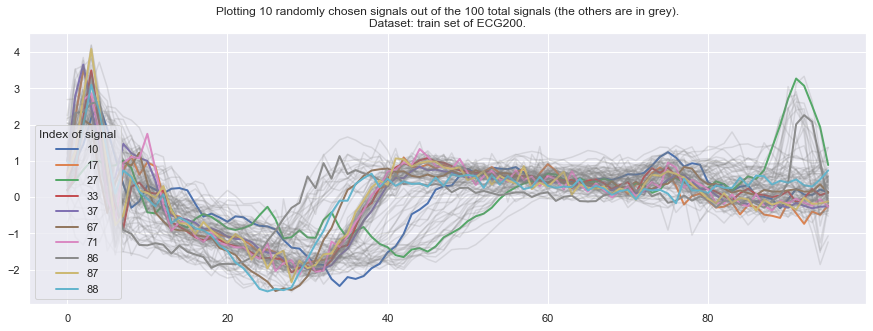

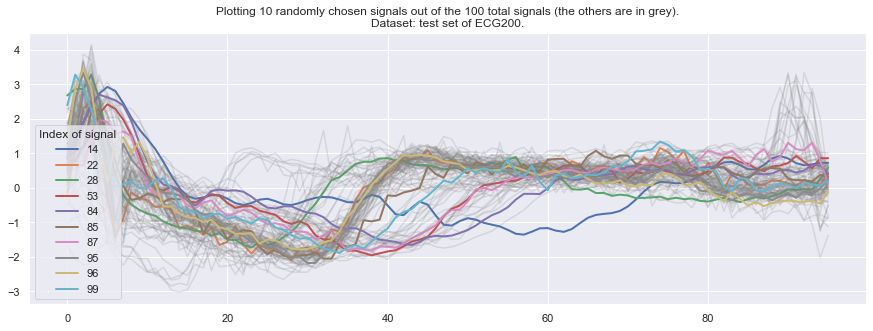

In [14]:
plot_signals(X_train_2d, dataset_name, 'train')
plot_signals(X_test_2d, dataset_name, 'test')

*Observations*:
- The data does not seem really noisy.
- The data does not seem to have huge variations in slope value (it is not sinusoidal for example).
- Overall, the signals from the train set and the test set look the same (except for the "bump" at the indexes 20 to 40).

### Examining the split train/test that is suggested

Let us manipulate a `pandas` DataFrame with the target feature:

In [15]:
def process_data(X_2d, y):

    df_X_2d = pd.DataFrame(X_2d)
    df_2d = df_X_2d.copy()
    df_2d["target"] = y
    df_2d["target"] = df_2d["target"].astype('int64')
    
    return df_2d

In [16]:
df_train_2d = process_data(X_train_2d, y_train)
df_test_2d = process_data(X_test_2d, y_test)

Now, let us look into the `target` feature:

In [17]:
print('Value counts of the target feature in the train set:')
display(df_train_2d['target'].value_counts())

print('\nValue counts of the target feature in the test set:')
display(df_test_2d['target'].value_counts())

Value counts of the target feature in the train set:


 1    69
-1    31
Name: target, dtype: int64


Value counts of the target feature in the test set:


 1    64
-1    36
Name: target, dtype: int64

*Observation*: The data is stratified: each set (train or test) contains approximately the same percentage of samples of each target class.

Now, let us get a sense of the average profiles of the signals within the train set and the test set:

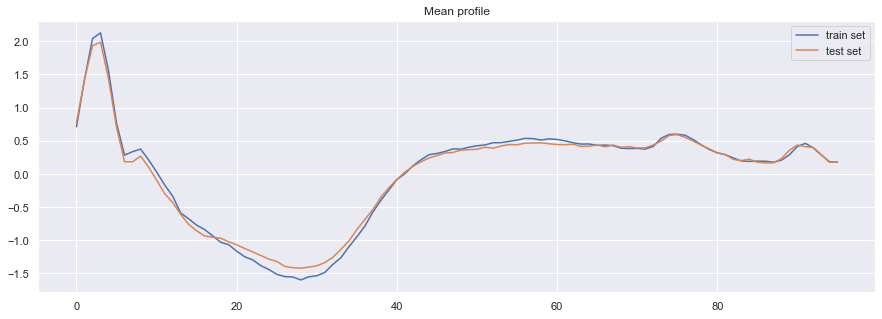

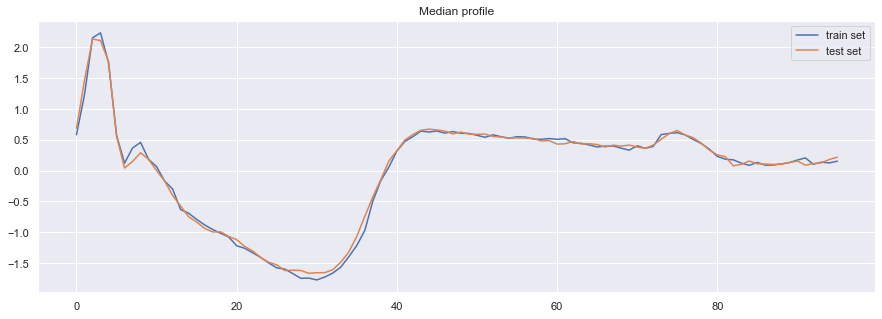

In [18]:
plt.figure()
plt.plot(df_train_2d.drop(columns='target').mean(), label='train set')
plt.plot(df_test_2d.drop(columns='target').mean(), label='test set')
plt.legend()
plt.title('Mean profile')
plt.show()

plt.figure()
plt.plot(df_train_2d.drop(columns='target').median(), label='train set')
plt.plot(df_test_2d.drop(columns='target').median(), label='test set')
plt.legend()
plt.title('Median profile')
plt.show()

*Observation*: On average, the signals from the train set or the test set look similar, hence the split seems to have done with shuffling.

### Looking into the target feature

First of all, we concatenate the train set with the test set:

In [19]:
df_train_test_2d = pd.concat([df_train_2d, df_test_2d])

Now, let us look at the signals given the target feature value:

Target: 1


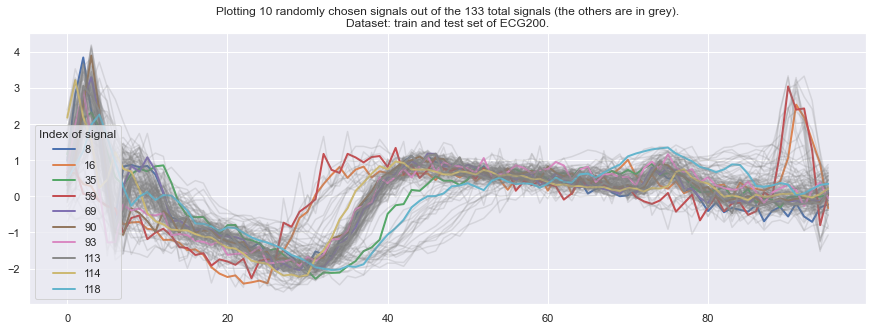


Target: -1


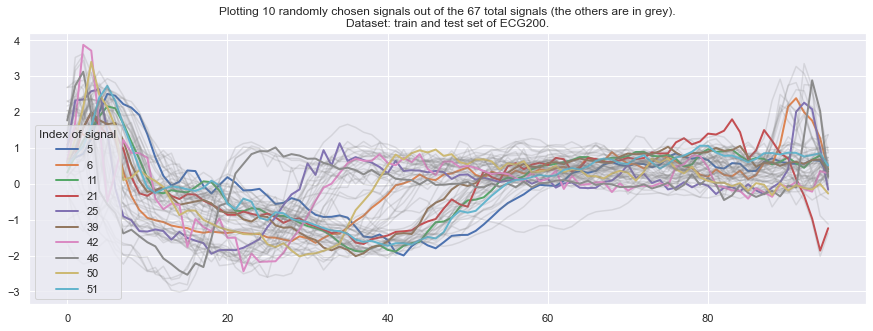

In [20]:
target = 1
print(f'Target: {target}')
plot_signals(np.array(df_train_test_2d.query(f'target == {target}').drop(columns='target')), dataset_name, 'train and test')

target = -1
print(f'\nTarget: {target}')
plot_signals(np.array(df_train_test_2d.query(f'target == {target}').drop(columns='target')), dataset_name, 'train and test')

*Observation*: The signals of the target feature `1` and `-1` look a little different.

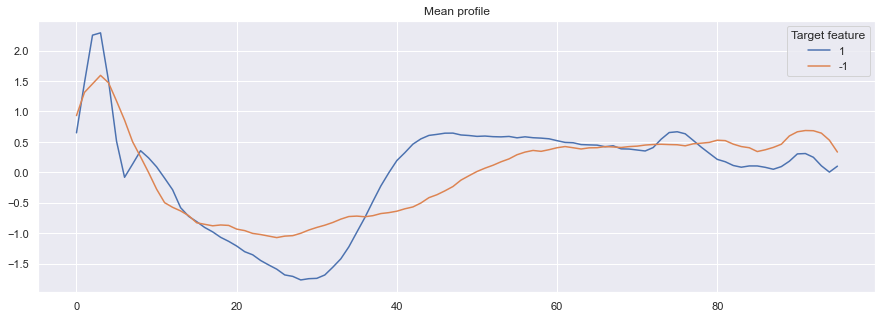

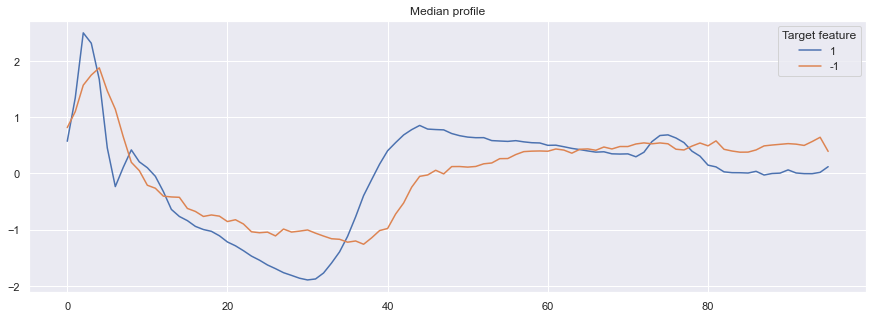

In [21]:
plt.figure()
plt.plot(df_train_test_2d.query('target == 1').drop(columns='target').mean(), label='1')
plt.plot(df_train_test_2d.query('target == -1').drop(columns='target').mean(), label='-1')
plt.legend(title='Target feature')
plt.title('Mean profile')
plt.show()

plt.figure()
plt.plot(df_train_test_2d.query('target == 1').drop(columns='target').median(), label='1')
plt.plot(df_train_test_2d.query('target == -1').drop(columns='target').median(), label='-1')
plt.legend(title='Target feature')
plt.title('Median profile')
plt.show()

*Observation*: The average profile of the target feature `1` and `-1` look different.

## Conclusion

This example shows how to use `loadmydata` to handle the ECG200 data set from the UEA/UCR repository. This data set is univariate and contains 200 signals of length 96. There are only two possible values for the target feature. The data seems to have already been z-normalized. The data has already been split into train/test (100 signals each), seemingly with shuffling and stratification with regards to the target feature.

## Authors

This example notebook has been authored by [Sylvain W. Combettes](https://sylvaincom.github.io) and edited by [Charles Truong](https://charles.doffy.net).